# Clasificación de flores Iris

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
X = iris.data[:, :2] #nos quedamos con la columna 0 y 1 (sepal length y sepal width)
Y = iris.target # 0,1,2 --->['setosa', 'versicolor', 'virginica']

In [17]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100 #tenemos 100 trozos igualmente distribuidos entre el min y el máx de x.

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #combiamos las x con las y

X_plot = np.c_[xx.ravel(), yy.ravel()] #creamos la parrilla de datos

## Aplicando un Kernel lineal

In [19]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape) #para que nos quede del mismo tamaño que la parrilla que hemos creado

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

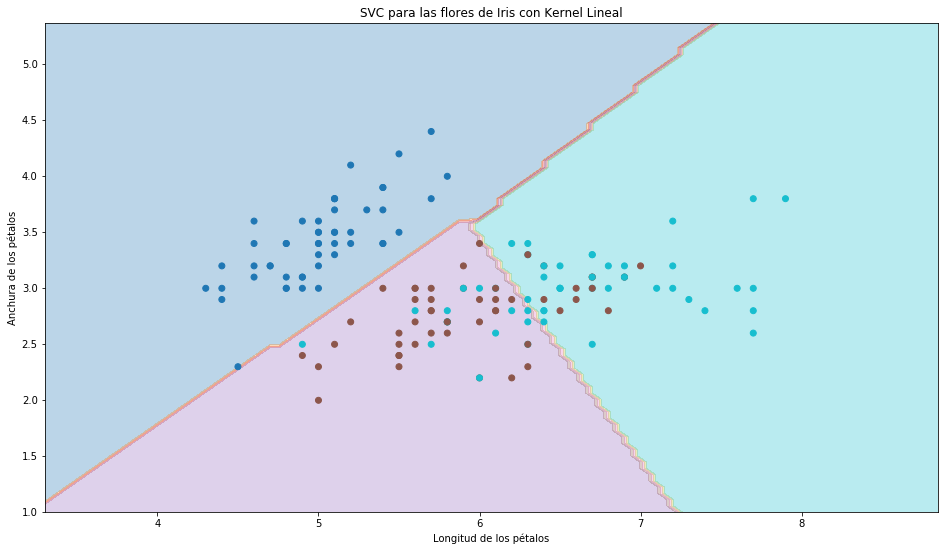

In [20]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3) #para dibujar las regiones(colores azul, verde y rosa con la separación color carne)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10) #pintamos los puntos
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

## Aplicando un Kernel basado en radial basic function (rbf)

In [43]:
C = 1.0
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

/home/david/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Radial')

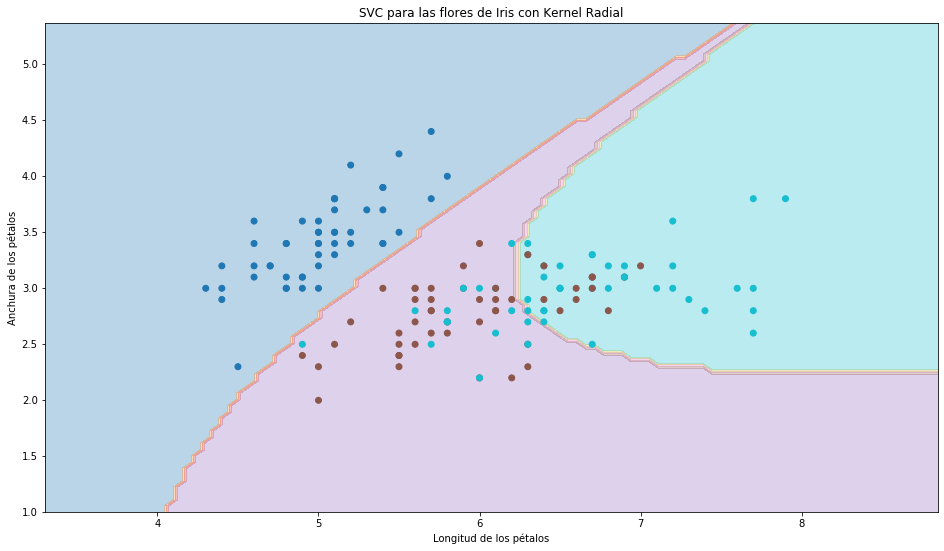

In [54]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial")

In [55]:
## Aplicando un Kernel polinomial (poly)

/home/david/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoide')

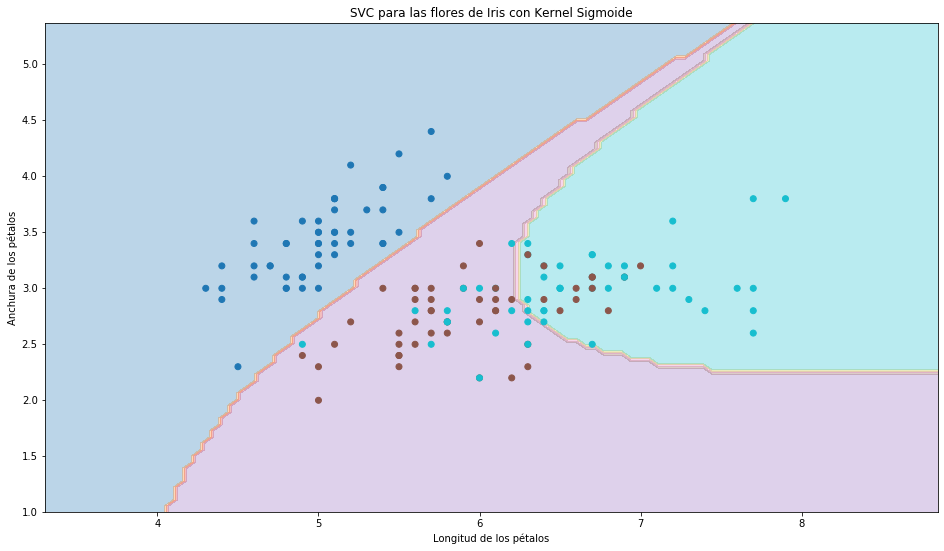

In [56]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Sigmoide")

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [58]:
X, Y = shuffle(X,Y, random_state = 0)

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0) #25% para entrenar

In [60]:
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2, 0.1, 0.2, 0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

In [62]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5) #cv es validacion cruzada(=5 elementos)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
clf.best_params_ #los mejores parametros del clasificador

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [33]:
clf.cv_results_

{'mean_fit_time': array([0.00132942, 0.00101128, 0.00100675, 0.00140171, 0.00116754,
        0.00073867, 0.00103216, 0.00080752, 0.00060606, 0.00054288,
        0.00054188, 0.00064297, 0.00075912, 0.00058289, 0.00050297,
        0.00061498, 0.0006855 , 0.00083652, 0.00053053, 0.00049448,
        0.00056992, 0.00129066, 0.00145578, 0.00245066, 0.00044656,
        0.00049186, 0.00072956, 0.00346665]),
 'std_fit_time': array([4.96371381e-04, 1.19377837e-04, 1.52296787e-04, 3.83805023e-04,
        7.34477044e-04, 2.02698165e-04, 2.47040970e-04, 1.63993166e-05,
        3.91180883e-06, 1.66640772e-05, 2.11080035e-05, 2.71982832e-05,
        2.85704654e-06, 1.40083039e-05, 7.50408985e-06, 2.87950428e-05,
        2.35817067e-05, 8.72504639e-05, 1.72799365e-05, 2.84056502e-05,
        2.23913509e-05, 1.53194399e-04, 2.58685850e-04, 9.73303923e-04,
        1.28631187e-05, 2.72269424e-05, 1.11641928e-04, 1.18523317e-03]),
 'mean_score_time': array([0.00047379, 0.00039787, 0.00043254, 0.00096951, 

In [34]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))

0.753 (+/-0.053) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.154) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.807 (+/-0.154) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.807 (+/-0.154) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.155) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.800 (+/-0.152) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.800 (+/-0.152) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.787 (+/-0.150) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.155) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.807 (+/-0.154) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.800 (+/-0.169) para {'C': 100, 'gamma'

In [35]:
y_pred = clf.predict(X_test)

In [36]:
print(classification_report(Y_test, y_pred, target_names=["setosa", "versicolor","virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.73      0.92      0.81        12
   virginica       0.86      0.60      0.71        10

    accuracy                           0.87        38
   macro avg       0.86      0.84      0.84        38
weighted avg       0.88      0.87      0.86        38



# Resumen final de la clasificación de Iris

In [63]:
def svm_iris(C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    
    
    X = iris.data[:, :2]
    Y = iris.target

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris con Kernel "+kernel)

In [64]:
from ipywidgets import interact, fixed

In [65]:
interact(svm_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>